# Program Assignment #4 - Linear Regression & Logistic Regression
---
## Name: 李勝維
## Student ID: 0711239
---

In [727]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
plt.rcParams["figure.figsize"] = (15,9)

# Linear Regression

# Data Generation

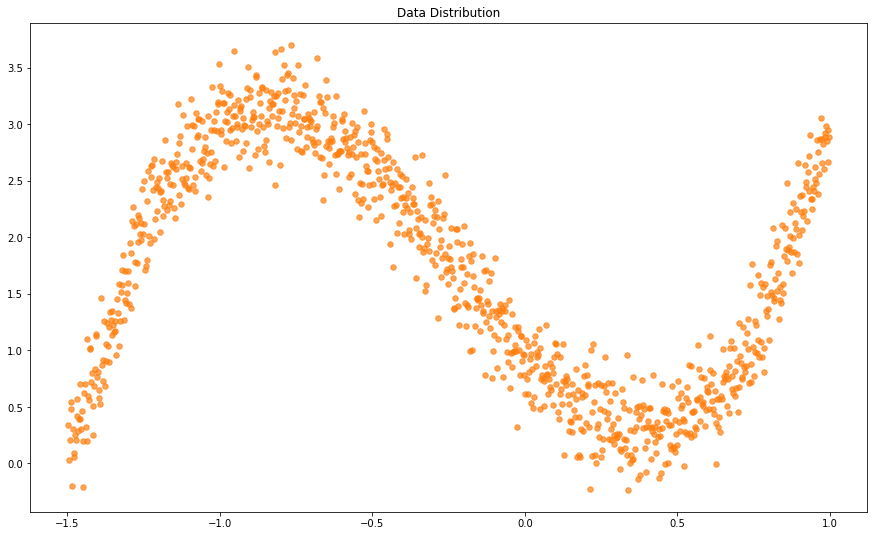

In [728]:
x = np.linspace(-1.5, 1.0, num=1002)[1:-1] # -1.5 < x < 1.0
epsilon = np.random.normal(0, 0.25, size=x.shape)
y = 3*x**3 + 2*x**2 - 3*x + 1 + epsilon

# plot
plt.figure()
plt.title("Data Distribution")
plt.scatter(x, y, s=30, alpha=0.7, c='tab:orange')
plt.show()

# Data Preprocessing

In [729]:
from sklearn.preprocessing import PolynomialFeatures as PF
poly_features = list()
for k in range(1, 5):
    poly = PF(k)
    tmp_x = poly.fit_transform(x[..., None])
    poly_features.append(tmp_x)

# Model Construction

No handles with labels found to put in legend.


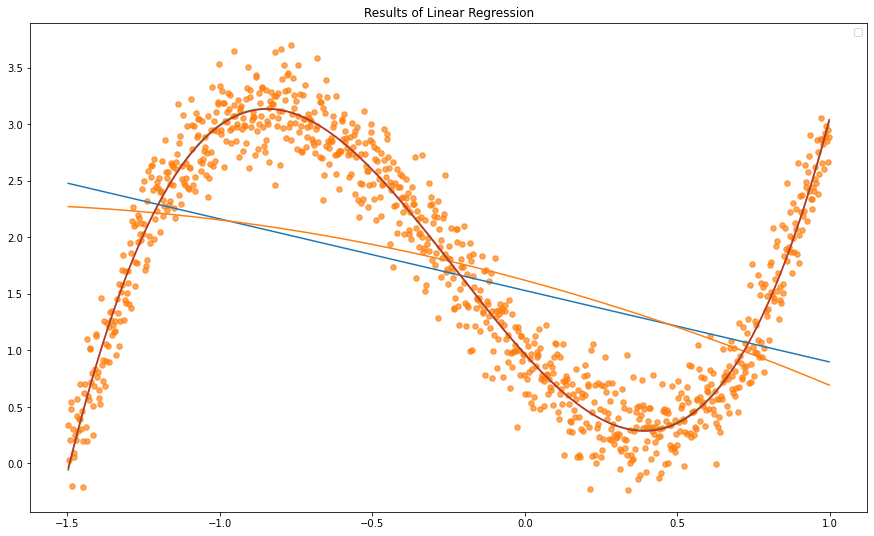

In [730]:
from sklearn.linear_model import LinearRegression

weights = list()
models = list()
for k, poly_x in enumerate(poly_features):
    lr_model = LinearRegression(fit_intercept=False, n_jobs=-1)
    f = lr_model.fit(poly_x, y)
    weights.append(list(f.coef_))
    models.append(f)

# weights[k-1] = coef of fitted function (increasing degree) from poly_features of degree k
plt.figure()
plt.title("Results of Linear Regression")
plt.scatter(x, y, s=30, alpha=0.7, c='tab:orange')
for poly_x, weights, model in zip(poly_features, weights, models):
    y_hat = model.predict(poly_x)
    plt.plot(x, y_hat)
plt.legend()
plt.show()

# Logistic Regression

In [731]:
# initialization
plt.rcParams["figure.figsize"] = (10,9)
# release memory
del x
del y

# Data Generation

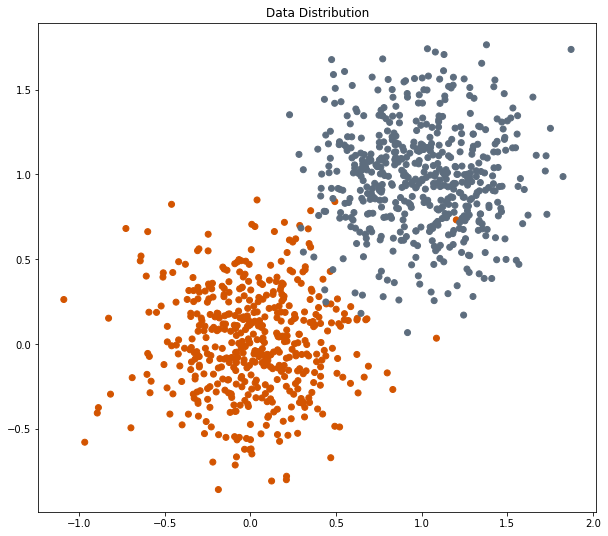

In [732]:
X0 = list()
X1 = list()
for _ in range(1000):
    yi = np.random.randint(0, 2)
    xi = np.random.multivariate_normal([yi, yi], [[0.1, 0], [0, 0.1]])
    if yi == 1:
        X1.append(xi)
    else:
        X0.append(xi)
X = np.vstack((X0, X1))
Y = np.hstack((np.zeros(len(X0)), np.ones((len(X1)))))

plt.figure()
plt.title("Data Distribution")
cmap_light = ListedColormap(['#F6DDCC','#D5D8DC'])
cmap_bold = ListedColormap(['#D35400', '#5D6D7E'])
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.show()

# Model Construction

In [733]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0, fit_intercept=True, n_jobs=-1)
lr_model.fit(X, Y)

LogisticRegression(n_jobs=-1, random_state=0)

# Results

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

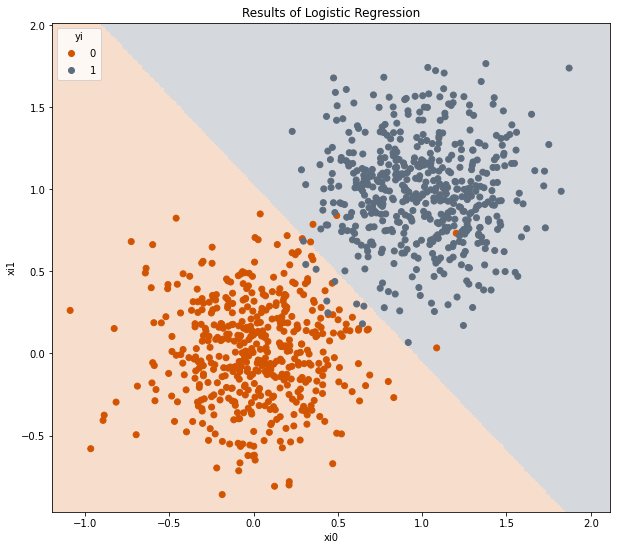

In [734]:
from IPython.display import display, Latex
from matplotlib.colors import ListedColormap
display(Latex(f"$Model\  Accuracy = {lr_model.score(X, Y):.3f}$"))
display(Latex(f'$y_i = L({lr_model.intercept_[0]:.2f}+ {lr_model.coef_[0, 0]:.2f} \\times x_{{i0}}+ {lr_model.coef_[0, 1]:.2f} \\times x_{{i1}})$'))

# plot decision boundry
h = 0.01 # block size of mesh
spacing = 0.25
spacing_left = 0.1
x_min, x_max = X[..., 0].min()-spacing_left, X[..., 0].max()+spacing
y_min, y_max = X[..., 1].min()-spacing_left, X[..., 1].max()+spacing
mesh_x, mesh_y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
in_ = np.column_stack((mesh_x.reshape(-1), mesh_y.reshape(-1)))
Z = lr_model.predict(in_)

Z = Z.reshape(mesh_x.shape)
fig, ax = plt.subplots()
ax.pcolormesh(mesh_x, mesh_y, Z, shading='auto', cmap=cmap_light)
scatter = ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlabel("xi0")
plt.ylabel("xi1")
plt.title("Results of Logistic Regression")
legend = ax.legend(*scatter.legend_elements(), title="yi")
plt.show()